In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from keras.models import Sequential
from keras.optimizers import SGD, Adamax
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import keras_utils
%matplotlib inline

Using TensorFlow backend.


In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True, reshape=False)

train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels

print()
print('## TRAIN')
print('train_labels', train_labels.shape)
print('train_dataset', train_dataset.shape)
print('## VALIDATION')
print('validation_labels', validation_labels.shape)
print('validation_dataset', validation_dataset.shape)
print('## TEST')
print('test_labels', test_labels.shape)
print('test_dataset', test_dataset.shape, '\n')

train_dataset = np.pad(train_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
validation_dataset = np.pad(validation_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
test_dataset = np.pad(test_dataset, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

print('## AFTER PADDING')
print('train_dataset', train_dataset.shape)
print('validation_dataset', validation_dataset.shape)
print('test_dataset', test_dataset.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.

## TRAIN
train_labels (55000, 10)
train_dataset (55000, 28, 28, 1)
## VALIDATION
validation_labels (5000, 10)
validation_dataset (5000, 28, 28, 1)
## TEST
test_labels (10000, 10)
test_dataset (10000, 28, 28, 1) 

## AFTER PADDING
train_dataset (55000, 32, 32, 1)
validation_dataset (5000, 32, 32, 1)


In [8]:
%%html
<img src='imgs/lenet5.png'>

In [3]:
model = Sequential()

# CONV 1
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=train_dataset.shape[1:], kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))

model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV 2
model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONV 3
model.add(Conv2D(120, (5, 5), activation='relu', kernel_initializer='he_normal',
                 use_bias=True, bias_initializer='he_normal'))
model.add(Flatten())

# DENSE 1
model.add(Dense(120, activation='relu', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))
model.add(Dropout(0.5))

# DENSE 2
model.add(Dense(84, activation='relu', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))
model.add(Dropout(0.5))

# OUTPUT
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal',
                use_bias=True, bias_initializer='he_normal'))

sgd = SGD(lr=0.03, momentum=0.1, decay=0.00005, nesterov=True)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
# checkpoint_file = 'keras_mnist_best_checkpoint.hdf5'
checkpoint_file = 'K_mnist_checkpoint_99_04.hdf5'
model.load_weights(checkpoint_file)

In [12]:
checkpoint_format = 'keras_mnist_ep_{epoch:03d}_v-acc_{acc:.3f}_v-loss_{loss:.3f}.hdf5'

callbacks = [
            # EarlyStopping(monitor='val_loss', patience=4,
            #               mode='min', min_delta=0.001, verbose=1),
            # EarlyStopping(monitor='val_acc', patience=4,
            #               mode='max', min_delta=0.001, verbose=1),
            ModelCheckpoint(checkpoint_format, monitor='val_acc', verbose=0,
                            save_best_only=True, save_weights_only=True,
                            mode='auto', period=1),
        ]

history = model.fit(x=train_dataset, y=train_labels, batch_size=32, epochs=100,
                    verbose=2, callbacks=callbacks,
                    validation_data=(validation_dataset, validation_labels),
                    shuffle=True, # validation_split=0.2,
                    # steps_per_epoch=len(train_labels)//batch_size,
                    # validation_steps=len(validation_labels)//batch_size
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
 - 22s - loss: 0.6418 - acc: 0.8002 - val_loss: 0.1345 - val_acc: 0.9630
Epoch 2/100
 - 10s - loss: 0.2080 - acc: 0.9452 - val_loss: 0.1030 - val_acc: 0.9712
Epoch 3/100
 - 10s - loss: 0.1483 - acc: 0.9608 - val_loss: 0.0893 - val_acc: 0.9804
Epoch 4/100
 - 10s - loss: 0.1191 - acc: 0.9692 - val_loss: 0.0675 - val_acc: 0.9820
Epoch 5/100
 - 10s - loss: 0.0972 - acc: 0.9756 - val_loss: 0.0720 - val_acc: 0.9836
Epoch 6/100
 - 10s - loss: 0.0892 - acc: 0.9777 - val_loss: 0.0638 - val_acc: 0.9854
Epoch 7/100
 - 10s - loss: 0.0761 - acc: 0.9812 - val_loss: 0.0644 - val_acc: 0.9864
Epoch 8/100
 - 10s - loss: 0.0660 - acc: 0.9834 - val_loss: 0.0595 - val_acc: 0.9878
Epoch 9/100
 - 10s - loss: 0.0613 - acc: 0.9849 - val_loss: 0.0560 - val_acc: 0.9876
Epoch 10/100
 - 10s - loss: 0.0549 - acc: 0.9856 - val_loss: 0.0536 - val_acc: 0.9888
Epoch 11/100
 - 10s - loss: 0.0494 - acc: 0.9871 - val_loss: 0.0519 - val_acc: 0.9896
Epoch 12/100
 

Epoch 96/100
 - 10s - loss: 0.0068 - acc: 0.9983 - val_loss: 0.0665 - val_acc: 0.9916
Epoch 97/100
 - 10s - loss: 0.0063 - acc: 0.9984 - val_loss: 0.0630 - val_acc: 0.9916
Epoch 98/100
 - 10s - loss: 0.0055 - acc: 0.9985 - val_loss: 0.0684 - val_acc: 0.9918
Epoch 99/100
 - 10s - loss: 0.0065 - acc: 0.9984 - val_loss: 0.0697 - val_acc: 0.9916
Epoch 100/100
 - 11s - loss: 0.0066 - acc: 0.9983 - val_loss: 0.0694 - val_acc: 0.9918


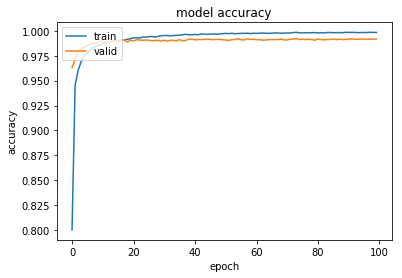

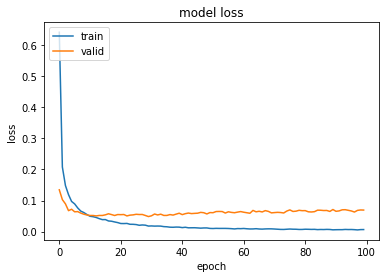

In [18]:
keras_utils.plot_history(history)

## LABELS
Shape of test labels:			 (10000, 10)
Shape of test labels argmax (index):	 (10000,)

## PREDICTIONS
Shape of predictions:			 (10000, 10)
Shape of predictions argmax (index):	 (10000,)

## FIRST SAMPLE
One-hot encoding: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
One-hot encoding argmax (index): 7

## CONFIDENCES OF FIRST PREDICTION
Confidences:
	 1.7737268e-13
	1.2449987e-09
	3.0549004e-11
	8.100754e-11
	6.6966505e-15
	2.1200649e-13
	2.4914386e-16
	1.0
	5.779476e-14
	3.5041165e-08
Argmax: 7


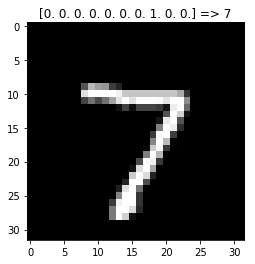

In [5]:
labels_max = test_labels.argmax(axis=-1)
print('## LABELS')
print('Shape of test labels:\t\t\t', test_labels.shape)
print('Shape of test labels argmax (index):\t', labels_max.shape)

predictions = model.predict_on_batch(test_dataset)
predictions_max = predictions.argmax(axis=-1)
print('\n## PREDICTIONS')
print('Shape of predictions:\t\t\t', predictions.shape)
print('Shape of predictions argmax (index):\t', predictions_max.shape)

print('\n## FIRST SAMPLE')
print('One-hot encoding:', test_labels[0])
print('One-hot encoding argmax (index):', labels_max[0])

plt.imshow(np.squeeze(test_dataset[0]), cmap=plt.get_cmap('gray'))
plt.title(f'{test_labels[0]} => {np.argmax(test_labels[0])}')

print('\n## CONFIDENCES OF FIRST PREDICTION')
print('Confidences:\n\t', '\n\t'.join([str(x) for x in predictions[0]]))
print('Argmax:', predictions_max[0])

Total: 10000
Erros: 96	Acurácia: 99.04%
Confusion matrix, without normalization


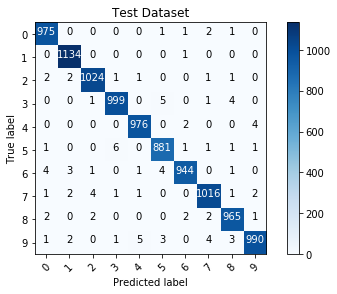

In [7]:
total = labels_max.shape[0]
errors = np.sum(labels_max != predictions_max)
print(f'Total: {total}')
print(f'Erros: {errors}\tAcurácia: {100.0 - (errors*100/total)}%')

cm = confusion_matrix(labels_max, predictions_max)
keras_utils.plot_confusion_matrix(cm, classes=[str(x) for x in range(10)],
                          normalize=False,
                          title='Test Dataset',
                          cmap=plt.cm.Blues)

In [8]:
from PIL import Image
m1 = np.array(Image.open('minion1.jpg'))
m2 = np.array(Image.open('minion2.jpg'))
m3 = np.zeros((2, *m1.shape))
m3[0] = m1
m3[1] = m2
print(m1.shape, m2.shape, m3.shape)


(354, 630, 3) (354, 630, 3) (2, 354, 630, 3)


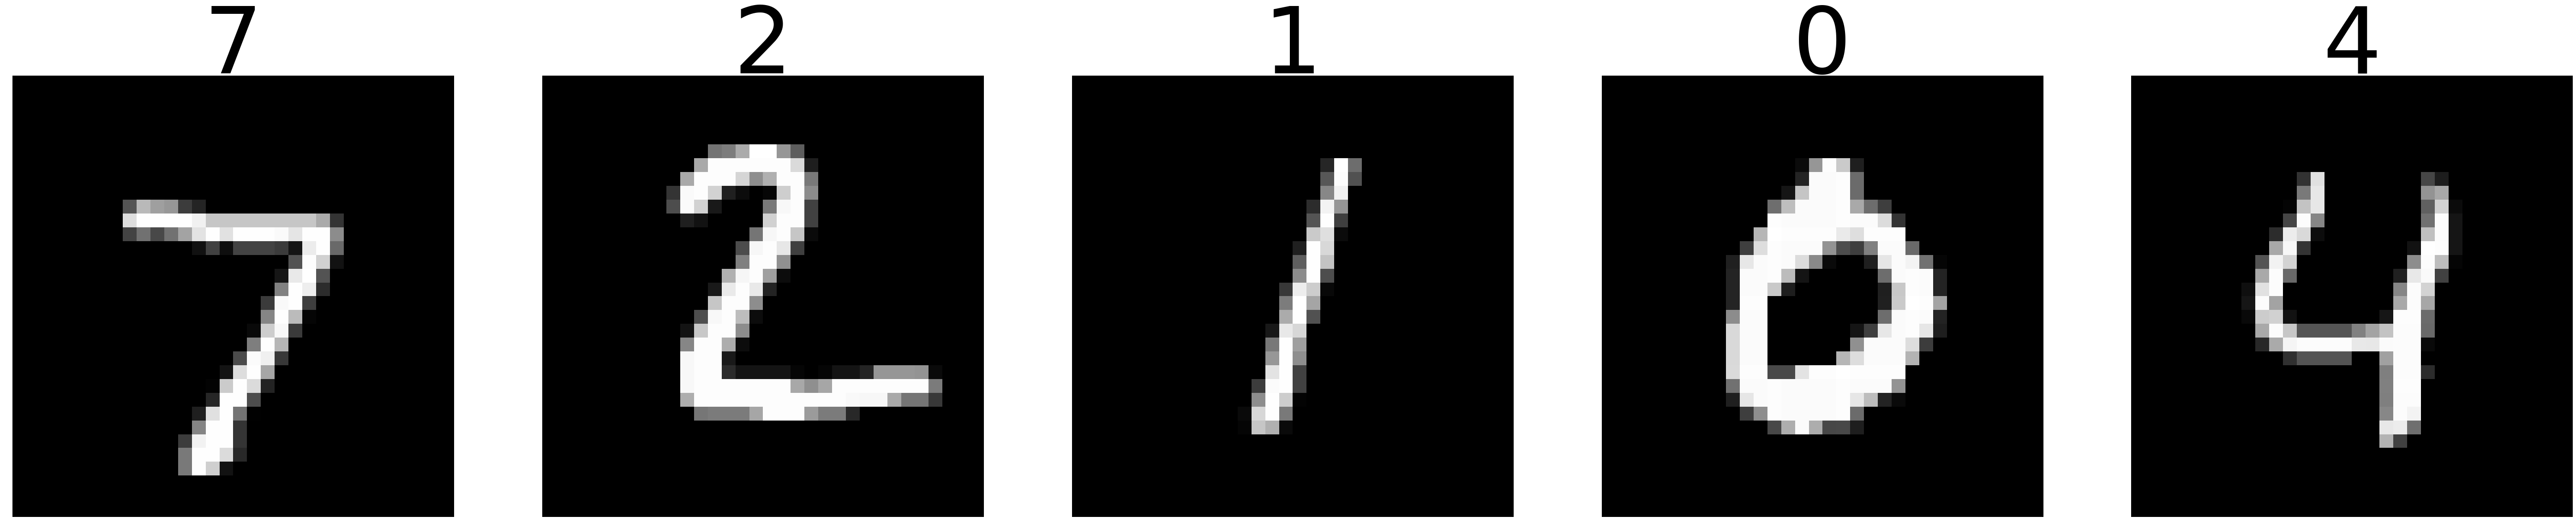

In [20]:
qty = 80
mi, ma = 0, 5
title_plots(test_dataset[mi:ma], titles=[str(i) for i in range(10)], titles_idx=keras_utils.confidence_to_one_hot(predictions[mi:ma]))

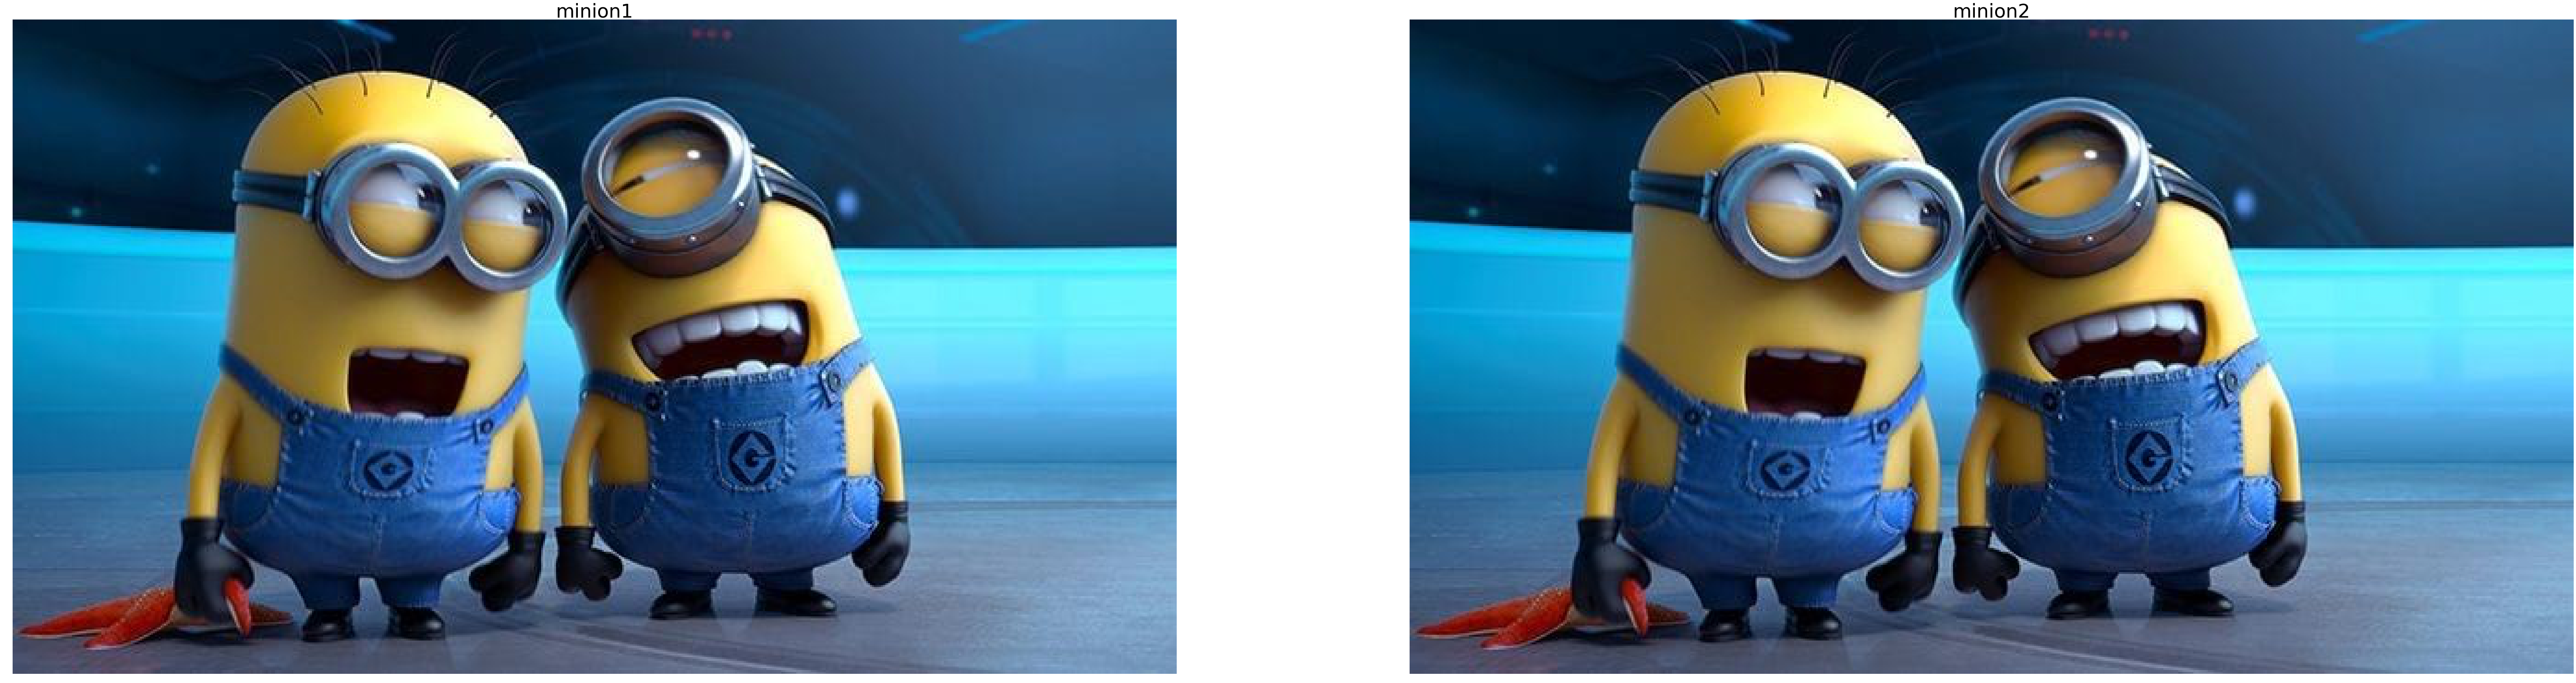

In [12]:
keras_utils.title_plots(m3, titles=['minion1', 'minion2'], titles_idx=np.array([[1., 0.], [0., 1.]]))

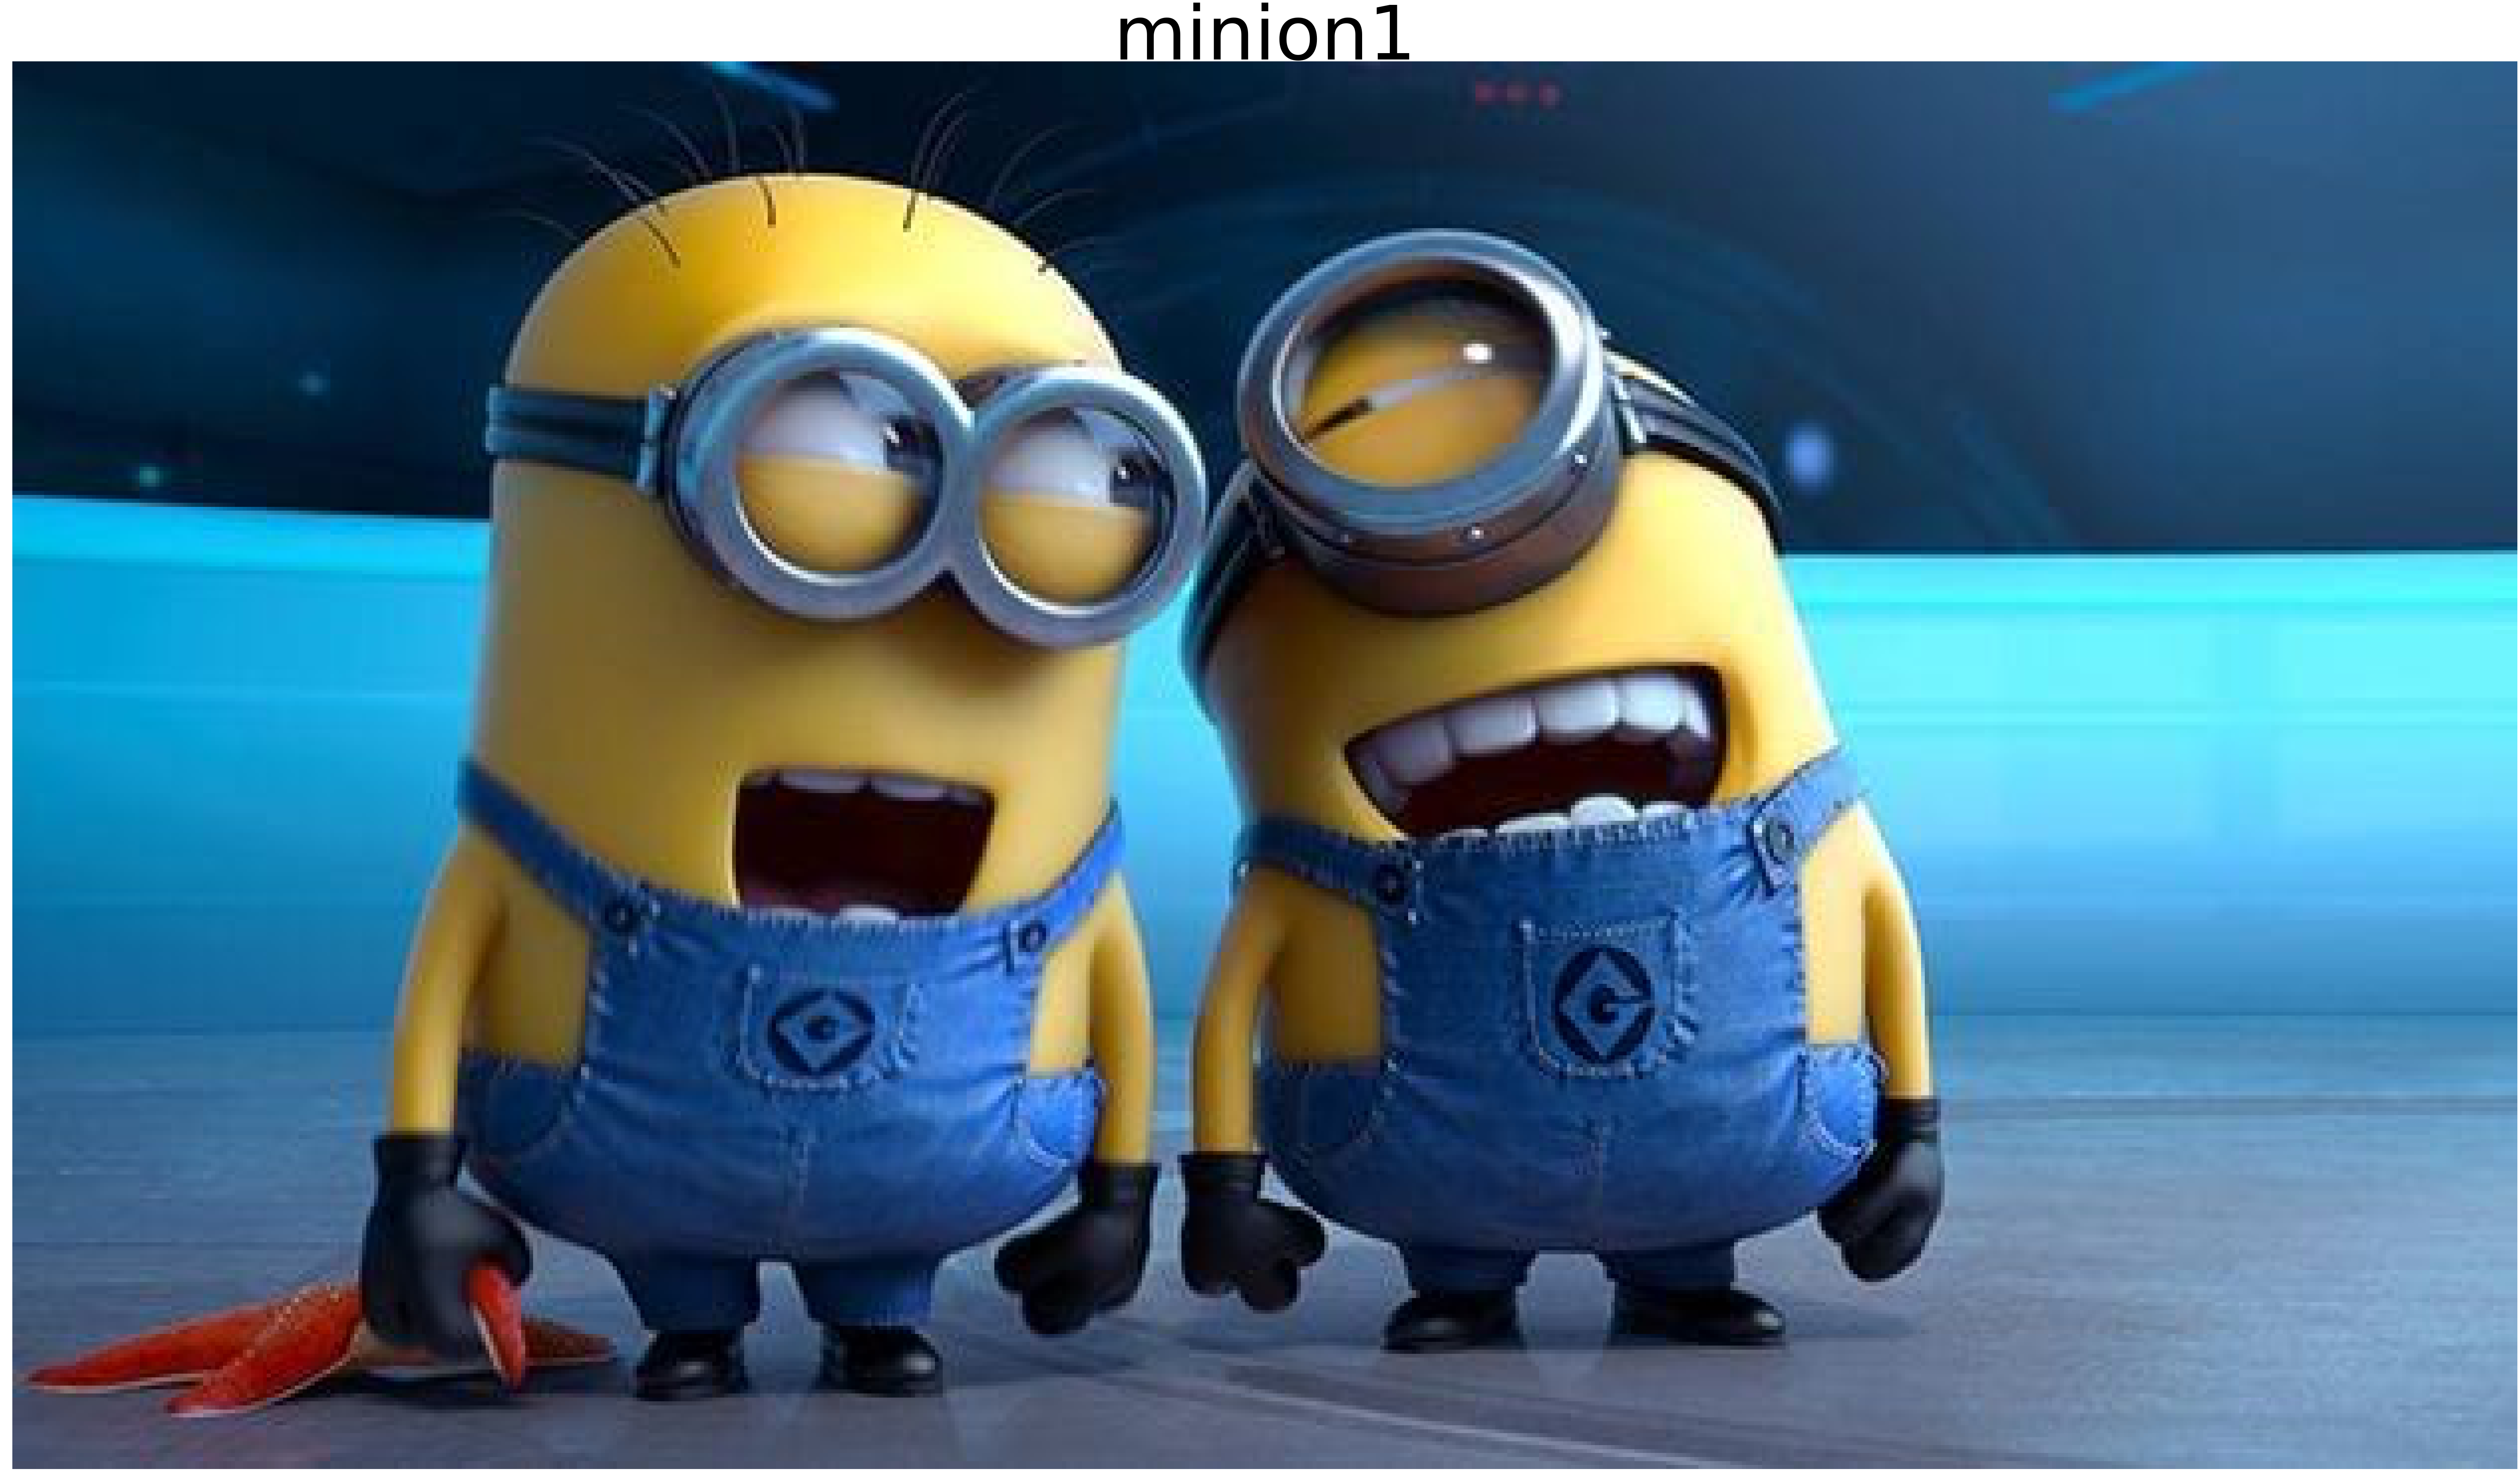

In [21]:
title_plots(m1, titles=['minion1', 'minion2'], titles_idx=np.array([[1., 0.]]))

In [19]:
def title_plots(imgs, titles=None, titles_idx=None):
    
    qty = 5
    unique_img = is_unique_img_list(imgs)
    
    if unique_img:
        iterations, last_imgs = 0, 1
    else:
        iterations = len(imgs) // qty
        last_imgs = len(imgs) % qty

    for i in range(iterations):
        section_start, section_end = i * qty, (i + 1) * qty
        plots(imgs[section_start:section_end], titles=titles, titles_idx=titles_idx[section_start:section_end])
    if last_imgs:
        slice_idx = last_imgs if qty < len(imgs) else 0
        factor = qty * iterations
        img_list = imgs if unique_img else imgs[factor:factor+last_imgs+1]
        titles_idx_list = titles_idx[0] if unique_img else titles_idx[factor:factor+last_imgs+1]
        plots(img_list, titles=titles, titles_idx=titles_idx_list)

        
def plots(ims, figsize=(120, 120), rows=1, interp=False, titles=None, titles_idx=None, unique_img=None, rgb=None):
    
    if type(ims[0]) is np.ndarray:
        
        # remove 1-length sized dimensions
        ims = np.squeeze(ims)
        n_dimensions = len(ims.shape)
        
        if n_dimensions == 4:
            unique_img = False
            rgb = True
        elif n_dimensions == 2:
            unique_img = True
            rgb = False
        elif n_dimensions == 3:
            unique_img = ims.shape[-1] == 3
            rgb = ims.shape[-1] == 3

        # float imgs -> [0 - 255]
        if ims.dtype != np.dtype('uint8'):
            ims = img_float_to_uint8(ims)

        # preventing non-float imgs from having the wrong range
        ims = np.array(ims).astype(np.uint8)

        # channel dimension can be on 2nd dimension
        if n_dimensions == 4 and (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1)) 
                    

    f = plt.figure(figsize=figsize)
    if unique_img:
        cols = 1
    else:
        cols = len(ims) // rows if len(ims) % 2 == 0 else len(ims) // rows + 1

    it_range = 1 if unique_img else len(ims)

    for i in range(it_range):
        sp = f.add_subplot(rows, cols, i + 1)
        sp.axis('Off')

        img = ims if unique_img else ims[i]

        if titles is not None:
            sp.set_title(titles[np.where(titles_idx[i] == 1.)[0][0]], fontsize=200)

        if rgb:
            plt.imshow(img, interpolation=None if interp else 'none')
        else:
            plt.imshow(img, interpolation=None if interp else 'none', cmap=plt.get_cmap('gray'))

def int_to_one_hot(values):
    n_values = np.max(values) + 1
    return np.eye(n_values)[values]

def confidence_to_one_hot(values):
    return int_to_one_hot(values.argmax(axis=-1))

def img_float_to_uint8(np_ar):
    old_min = np.amin(np_ar)
    old_max = np.amax(np_ar)
    
    if old_min < 0.0:
        old_range = old_max - old_min

        return (((np_ar - old_min) / old_range) * 255).astype('uint8')
    elif old_min >= 0.0 and old_max <= 1.0:
        return (np_ar * 255).astype('uint8')
    else:
        return np_ar.astype('uint8')

def is_unique_img_list(ims):
    ims = np.squeeze(ims)
    n_dimensions = len(ims.shape)

    if n_dimensions == 4:
        unique_img = False
    elif n_dimensions == 2:
        unique_img = True
    elif n_dimensions == 3:
        unique_img = ims.shape[-1] == 3
    return unique_img

def is_rgb_img_list(ims):
    ims = np.squeeze(ims)
    n_dimensions = len(ims.shape)

    if n_dimensions == 4:
        rgb = True
    elif n_dimensions == 2:
        rgb = False
    elif n_dimensions == 3:
        rgb = ims.shape[-1] == 3
    return rgb


In [28]:
print(predictions.argmax(axis=-1)[:5])
print(confidence_to_one_hot(predictions)[:5])

[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [14]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_history(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

def print_results():
    labels_max = test_labels.argmax(axis=-1)

    predictions = model.predict_on_batch(test_dataset)
    predictions_max = predictions.argmax(axis=-1)

    total = len(labels_max)
    errors = np.sum(labels_max!=predictions_max)
    print(f'Total: {total}')
    print(f'Erros: {errors}\tAcurácia: {100.0-(errors*100/total)}%')

    cm = confusion_matrix(labels_max, predictions_max)
    plot_confusion_matrix(cm, [str(x) for x in range(10)],
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues)